<a href="https://colab.research.google.com/github/gorogoro-uk/Machine-Learning/blob/master/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exploratory Data Analysis with Python

---

Task: 

Use Python to demonstrate exploratory data analysis techniques on a sample dataset.

The dataset is from:

https://archive.ics.uci.edu/ml/datasets/Early+stage+diabetes+risk+prediction+dataset.

In [53]:
# import modules
import urllib.request
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# get dataset from UCI
URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00529/diabetes_data_upload.csv'
DATA_FILE = 'diabetes_data.txt'
urllib.request.urlretrieve(URL, DATA_FILE)

('diabetes_data.txt', <http.client.HTTPMessage at 0x7f11168d52e8>)

In [63]:
# import dataset into pandas dataframe
print(f"DATA_FILE: {DATA_FILE}")
df = pd.read_csv(DATA_FILE)
df.head()

DATA_FILE: diabetes_data.txt


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [ ]:
# basic dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

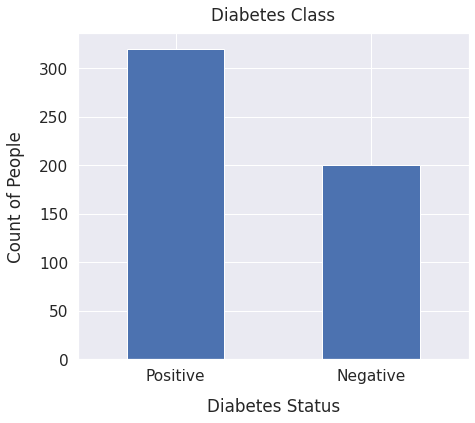

In [54]:
# histogram of target variable 'class'
sns.set(font_scale=1.4)
df['class'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Diabetes Status", labelpad=14)
plt.ylabel("Count of People", labelpad=14)
plt.title("Diabetes Class", y=1.02);

In [ ]:
# distribution of numerical variables
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,520.0,48.028846,12.151466,16.0,39.0,47.5,57.0,90.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f110ead7908>]],
      dtype=object)

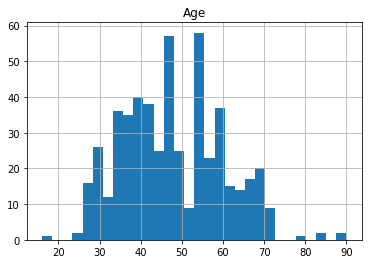

In [ ]:
# histogram of numerical variable Age
df.hist(bins=30)

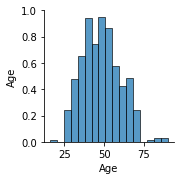

In [ ]:
# encode categorical data with numerals


In [33]:
# get categorical features only
df.select_dtypes(include=['object'])

,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


In [39]:
df.select_dtypes(include=['object']).columns.values

Index(['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness',
       'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching',
       'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [60]:
# encode 'class' as integer
df['class'] = df['class'].astype('category')
df['class_cat'] = df['class'].cat.codes
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 520 non-null    int64   
 1   Gender              520 non-null    object  
 2   Polyuria            520 non-null    object  
 3   Polydipsia          520 non-null    object  
 4   sudden weight loss  520 non-null    object  
 5   weakness            520 non-null    object  
 6   Polyphagia          520 non-null    object  
 7   Genital thrush      520 non-null    object  
 8   visual blurring     520 non-null    object  
 9   Itching             520 non-null    object  
 10  Irritability        520 non-null    object  
 11  delayed healing     520 non-null    object  
 12  partial paresis     520 non-null    object  
 13  muscle stiffness    520 non-null    object  
 14  Alopecia            520 non-null    object  
 15  Obesity             520 non-null    obje

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class,class_cat
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive,1
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive,1
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive,1
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive,1
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive,1


In [64]:
# encode categorical features as integers
# check number of values in each categorical feature
for col in df.select_dtypes(include=['object']).columns:
    print(col)
    df[col] = df[col].astype('category')
    df[col+'_cat'] = df[col].cat.codes
df.info()


Gender
Polyuria
Polydipsia
sudden weight loss
weakness
Polyphagia
Genital thrush
visual blurring
Itching
Irritability
delayed healing
partial paresis
muscle stiffness
Alopecia
Obesity
class
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Age                     520 non-null    int64   
 1   Gender                  520 non-null    category
 2   Polyuria                520 non-null    category
 3   Polydipsia              520 non-null    category
 4   sudden weight loss      520 non-null    category
 5   weakness                520 non-null    category
 6   Polyphagia              520 non-null    category
 7   Genital thrush          520 non-null    category
 8   visual blurring         520 non-null    category
 9   Itching                 520 non-null    category
 10  Irritability            520 non-null    category
 11

In [66]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class,Gender_cat,Polyuria_cat,Polydipsia_cat,sudden weight loss_cat,weakness_cat,Polyphagia_cat,Genital thrush_cat,visual blurring_cat,Itching_cat,Irritability_cat,delayed healing_cat,partial paresis_cat,muscle stiffness_cat,Alopecia_cat,Obesity_cat,class_cat
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
